------
# Test de recherche d'un mot du cloud dans les fichiers

In [1]:
import os
from tika import parser
from datetime import datetime
import numpy as np

In [2]:
import global_variables as g
g.init()

In [3]:
now = datetime.now()
 
if g.DEBUG_OL >= 2:
    print("now =", now)

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
#print("date and time =", dt_string)


In [4]:
#recherche_mot = 'bleed'.lower()
#recherche_mot = 'action'.lower()
#recherche_mot = 'temperature'.lower()
#recherche_mot = 'bar'.lower()
#recherche_mot = 'carbone'.lower()
recherche_mot = 'aluminium'.lower()
#recherche_mot = 'tire'.lower()

## Nettoyage du fichier et retrait des colonnes category et file

In [5]:
import pandas as pd
import numpy as np
import csv

#category='doc-photo'
category='doc-engineering'
#category="doc-airbus"

input_file = category+'__cloudword__level1.csv'

output_file = category+'__cloudword__level2.csv'
output_dest2 = category+'__cloudword__dest2.csv'

if g.DEBUG_OL >= 1:
    print('input_file: ',input_file)
    print('output_file:',output_file)

reader = csv.reader(open(input_file))

max_columns=0

for row in reader:
    if g.DEBUG_OL >= 2:
        print(row)
        print(len(row),row)
    if len(row) > max_columns:
        max_columns=len(row)
print("max_columns:",max_columns)

input_file:  doc-engineering__cloudword__level1.csv
output_file: doc-engineering__cloudword__level2.csv
max_columns: 20


In [6]:
reader = csv.reader(open(input_file))
numlines = len(list(reader))
if g.DEBUG_OL >= 1:
    print("Lines:",numlines)

Lines: 23


## Create level2 file top get file names

In [7]:
col_headers= ['category','file']
for aa in range(max_columns-1):
    col_headers.append('M'+str(aa))

if g.DEBUG_OL >= 2:
    print('Col_headers:',col_headers)
    

#my_loaded_array = pd.read_csv(input_file,dtype=str,header=None,names=col_headers)
my_loaded_array = pd.read_csv(input_file,dtype=str,names=col_headers)

my_loaded_array=my_loaded_array.fillna('')
if g.DEBUG_OL >= 2:
    display(my_loaded_array)
    
array_values = my_loaded_array.values
if g.DEBUG_OL >= 2:
    print(array_values)

if g.DEBUG_OL >= 2:
    print(recherche_mot)

toto=array_values[:,0:max_columns] == recherche_mot
if g.DEBUG_OL >= 2:
    print(toto)
    
cloud_word_lvl2 = open(output_file, 'w')
coltitle= ','.join(col_headers)
cloud_word_lvl2.write(coltitle)
cloud_word_lvl2.write('\x0A')
for i in range(my_loaded_array.shape[0]):
#    print(i,'\t', toto[i,:])
    if True in toto[i,:]:
        if g.DEBUG_OL >= 2:
            print(i,'OK')
            print(array_values[i,0:])
        TEMPstring = ','.join(array_values[i,:])
        if g.DEBUG_OL >= 2:
            print(TEMPstring)
        cloud_word_lvl2.write(TEMPstring)
        cloud_word_lvl2.write('\x0A')
#    else:
#        if g.DEBUG_OL >= 2:
#            print(i,'Not OK',array_values[i,0:])
        
cloud_word_lvl2.close()

print('***** Fini! fichier:',output_file,' généré *****')

***** Fini! fichier: doc-engineering__cloudword__level2.csv  généré *****


## Create dest2 file for cloudword

In [8]:
my_loaded_array = pd.read_csv(output_file,dtype=str)
my_loaded_array=my_loaded_array.drop(['category'], axis=1)
my_loaded_array=my_loaded_array.drop(['file'], axis=1)

num_lines=len(my_loaded_array)
if g.DEBUG_OL >= 2:
    print(num_lines)
    display(my_loaded_array)

my_loaded_array=my_loaded_array.fillna('')
if g.DEBUG_OL >= 2:
    display(my_loaded_array)
    
array_values = my_loaded_array.values
if g.DEBUG_OL >= 2:
    print(array_values)
    
cloud_word_dest2 = open(output_dest2, 'w')

for k in range(num_lines):
    if g.DEBUG_OL >= 2:
        print("k:",k)
        print('ligne:',array_values[k])
   
    result=','.join(array_values[k])
    if g.DEBUG_OL >= 2:
        print('result:',result)
    cloud_word_dest2.write(result)
    cloud_word_dest2.write('\x0A')

cloud_word_dest2.close()

print('***** Fini! fichier:',output_dest2,' généré *****')

***** Fini! fichier: doc-engineering__cloudword__dest2.csv  généré *****


------
# generate cloudwords

In [9]:
from wordcloud import WordCloud , ImageColorGenerator
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
MY_DPI = 96 # (site: https://fr.infobyip.com/detectmonitordpi.php)
image_mask = np.array(Image.open("airbus3.jpg"))
#print(matrix_image_mask)
if g.DEBUG_OL >= 2:
    print(image_mask.shape)
image_colors=ImageColorGenerator(image_mask)

In [10]:
def generate_cloud_words(TEXT_FILE_PATH):
    from wordcloud import WordCloud 
    import matplotlib.pyplot as plt
    # constantes
    MY_DPI = 96 # (site: https://fr.infobyip.com/detectmonitordpi.php)

#    TEXT_FILE_PATH='cloudword_source.txt'
    with open(TEXT_FILE_PATH, 'r') as file:
        text= file.read()
#    print(text)
    tmp_file=text.split('\n')
    STOP_WORDS_FILE="stop_words_french.txt"
    #STOP_WORDS_FILE="stop_words_english.txt"

    with open(STOP_WORDS_FILE, 'r') as file:
        stop_words = file.read().splitlines()
    
    wc = WordCloud(
        background_color="white",
        width =1920,
        height=1080,
        margin=10,
#        mask=image_mask,
        max_words=100,
        stopwords=stop_words,
        repeat=False,
        collocations=False
    ).generate(text)

    plt.figure(figsize=(1920/MY_DPI,1080/MY_DPI))


    plt.imshow(wc.recolor(color_func=image_colors),interpolation='bilinear')
    plt.axis('off') # enleve les axes
    plt.margins(x=0, y=0)
    plt.savefig(category+'__cloudwords__dest2.png', dpi=MY_DPI)
    return(len(tmp_file)-1)

Nombre de fichiers traités: 1


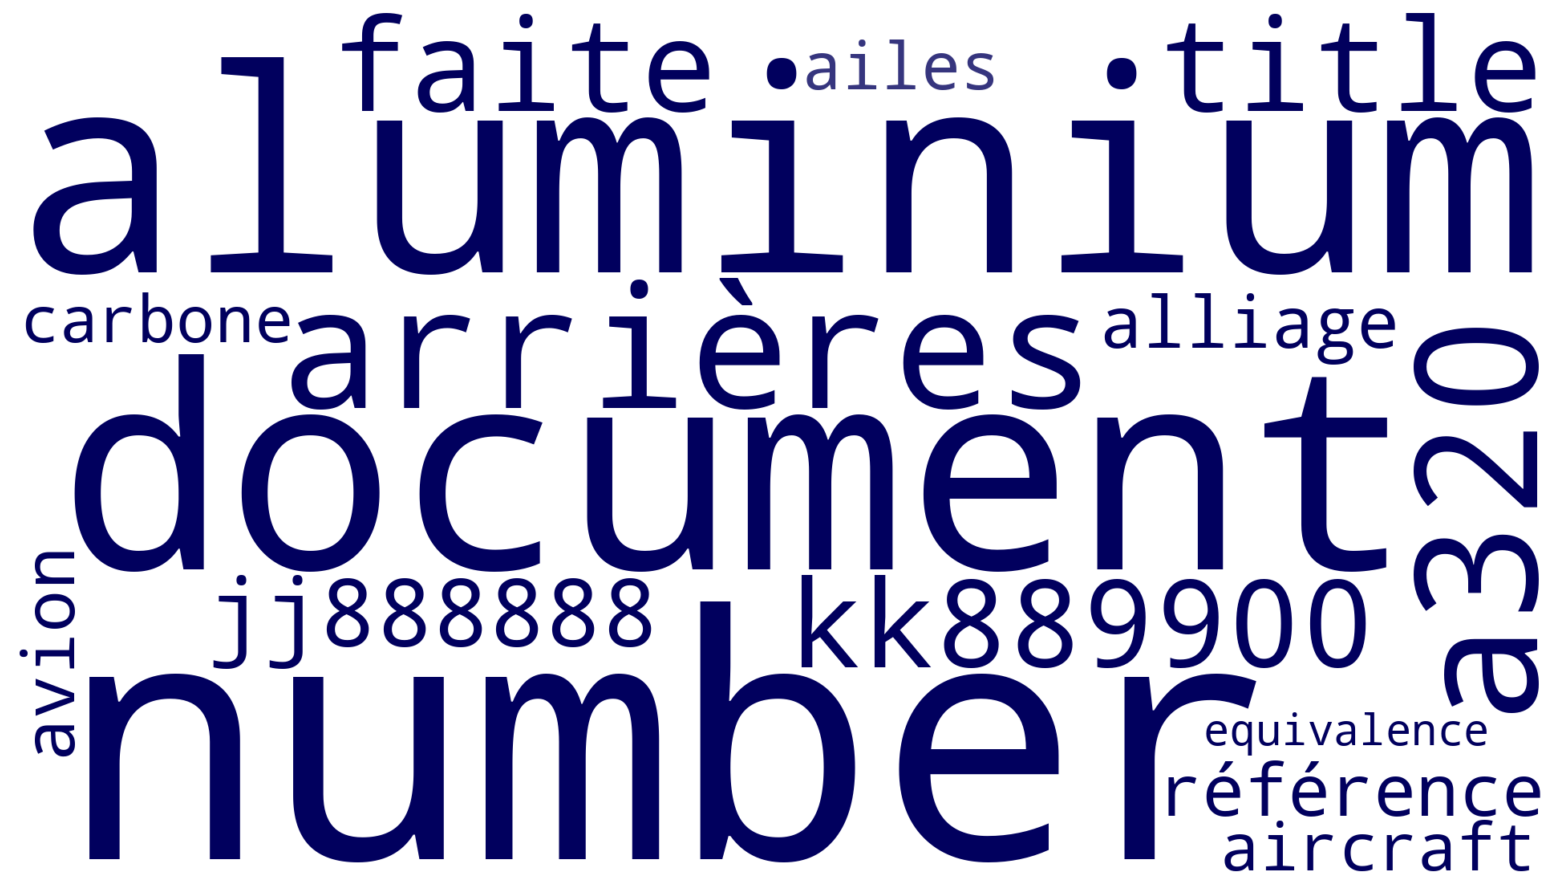

In [11]:
files_qtt=generate_cloud_words(output_dest2)
print("Nombre de fichiers traités:",files_qtt)

In [12]:
#if g.DEBUG_OL >= 1:
print(os.getcwd(),__name__,'imported')

/media/olivier/Donnees/Documents/Formations/tika/jupyter_files __main__ imported
